In [1]:
# Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to
 keep all customers who have done transactions with us and select the join type accordingly.

IndentationError: unexpected indent (Temp/ipykernel_4240/2897560093.py, line 2)

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [112]:
os.chdir(r"C:\Users\avita\Documents\Analytics Lab 2021\Python\Case study\case study data frame")


In [113]:
%pwd

'C:\\Users\\avita\\Documents\\Analytics Lab 2021\\Python\\Case study\\case study data frame'

In [114]:
%cd "C:\Users\avita\Documents\Analytics Lab 2021\Python\Case study\case study data frame"

C:\Users\avita\My Python stufff


In [115]:
%pwd

'C:\\Users\\avita\\Documents\\Analytics Lab 2021\\Python\\Case study\\case study data frame'

In [116]:
customer = pd.read_csv("Customer.csv")
customer




customer_Id         DOB Gender  city_code
0          268408  02-01-1970      M        4.0
1          269696  07-01-1970      F        8.0
2          268159  08-01-1970      F        8.0
3          270181  10-01-1970      F        2.0
4          268073  11-01-1970      M        1.0
...           ...         ...    ...        ...
5642       274474  19-12-1992      M        2.0
5643       267666  24-12-1992      M        6.0
5644       270476  25-12-1992      F        3.0
5645       269626  27-12-1992      F        5.0
5646       274308  29-12-1992      F        5.0

[5647 rows x 4 columns]

In [117]:
prod_info=pd.read_csv("prod_cat_info.csv")
prod_info

prod_cat_code          prod_cat  prod_sub_cat_code          prod_subcat
0               1          Clothing                  4                 Mens
1               1          Clothing                  1                Women
2               1          Clothing                  3                 Kids
3               2          Footwear                  1                 Mens
4               2          Footwear                  3                Women
5               2          Footwear                  4                 Kids
6               3       Electronics                  4              Mobiles
7               3       Electronics                  5            Computers
8               3       Electronics                  8  Personal Appliances
9               3       Electronics                  9              Cameras
10              3       Electronics                 10      Audio and video
11              4              Bags                  1                 Mens
12              4              Bags                  4                Women
13              5             Books                  7              Fiction
14              5             Books                 12             Academic
15              5             Books                 10          Non-Fiction
16              5             Books                 11             Children
17              5             Books                  3               Comics
18              5             Books                  6                  DIY
19              6  Home and kitchen                  2           Furnishing
20              6  Home and kitchen                 10              Kitchen
21              6  Home and kitchen                 11                 Bath
22              6  Home and kitchen                 12                Tools

In [118]:
transaction=pd.read_csv("Transactions.csv")
transaction

transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  \
0         80712190438   270351  28-02-2014                 1              1   
1         29258453508   270384  27-02-2014                 5              3   
2         51750724947   273420  24-02-2014                 6              5   
3         93274880719   271509  24-02-2014                11              6   
4         51750724947   273420  23-02-2014                 6              5   
...               ...      ...         ...               ...            ...   
23048     94340757522   274550  25-01-2011                12              5   
23049     89780862956   270022  25-01-2011                 4              1   
23050     85115299378   271020  25-01-2011                 2              6   
23051     72870271171   270911  25-01-2011                11              5   
23052     77960931771   271961  25-01-2011                11              5   

       Qty  Rate      Tax  total_amt Store_type  
0       -5  -772  405.300  -4265.300     e-Shop  
1       -5 -1497  785.925  -8270.925     e-Shop  
2       -2  -791  166.110  -1748.110   TeleShop  
3       -3 -1363  429.345  -4518.345     e-Shop  
4       -2  -791  166.110  -1748.110   TeleShop  
...    ...   ...      ...        ...        ...  
23048    1  1264  132.720   1396.720     e-Shop  
23049    1   677   71.085    748.085     e-Shop  
23050    4  1052  441.840   4649.840        MBR  
23051    3  1142  359.730   3785.730   TeleShop  
23052    1   447   46.935    493.935   TeleShop  

[23053 rows x 10 columns]

In [153]:
transaction.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
dtype: int64

In [119]:
prod_info.rename(columns={"prod_sub_cat_code":"prod_subcat_code"},inplace=True)

In [120]:
prod_concat = pd.merge(left=transaction, right=prod_info,on=["prod_cat_code","prod_subcat_code"],how="left")

In [121]:
prod_concat

transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  \
0         80712190438   270351  28-02-2014                 1              1   
1         29258453508   270384  27-02-2014                 5              3   
2         51750724947   273420  24-02-2014                 6              5   
3         93274880719   271509  24-02-2014                11              6   
4         51750724947   273420  23-02-2014                 6              5   
...               ...      ...         ...               ...            ...   
23048     94340757522   274550  25-01-2011                12              5   
23049     89780862956   270022  25-01-2011                 4              1   
23050     85115299378   271020  25-01-2011                 2              6   
23051     72870271171   270911  25-01-2011                11              5   
23052     77960931771   271961  25-01-2011                11              5   

       Qty  Rate      Tax  total_amt Store_type          prod_cat prod_subcat  
0       -5  -772  405.300  -4265.300     e-Shop          Clothing       Women  
1       -5 -1497  785.925  -8270.925     e-Shop       Electronics   Computers  
2       -2  -791  166.110  -1748.110   TeleShop             Books         DIY  
3       -3 -1363  429.345  -4518.345     e-Shop  Home and kitchen        Bath  
4       -2  -791  166.110  -1748.110   TeleShop             Books         DIY  
...    ...   ...      ...        ...        ...               ...         ...  
23048    1  1264  132.720   1396.720     e-Shop             Books    Academic  
23049    1   677   71.085    748.085     e-Shop          Clothing        Mens  
23050    4  1052  441.840   4649.840        MBR  Home and kitchen  Furnishing  
23051    3  1142  359.730   3785.730   TeleShop             Books    Children  
23052    1   447   46.935    493.935   TeleShop             Books    Children  

[23053 rows x 12 columns]

In [154]:
prod_concat.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
dtype: int64

In [155]:
customer_final = pd.merge(left=prod_concat, right=customer,right_on="customer_Id", left_on="cust_id", how="left")

In [156]:
customer_final

transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  \
0         80712190438   270351  28-02-2014                 1              1   
1         29258453508   270384  27-02-2014                 5              3   
2         51750724947   273420  24-02-2014                 6              5   
3         93274880719   271509  24-02-2014                11              6   
4         51750724947   273420  23-02-2014                 6              5   
...               ...      ...         ...               ...            ...   
23048     94340757522   274550  25-01-2011                12              5   
23049     89780862956   270022  25-01-2011                 4              1   
23050     85115299378   271020  25-01-2011                 2              6   
23051     72870271171   270911  25-01-2011                11              5   
23052     77960931771   271961  25-01-2011                11              5   

       Qty  Rate      Tax  total_amt Store_type          prod_cat prod_subcat  \
0       -5  -772  405.300  -4265.300     e-Shop          Clothing       Women   
1       -5 -1497  785.925  -8270.925     e-Shop       Electronics   Computers   
2       -2  -791  166.110  -1748.110   TeleShop             Books         DIY   
3       -3 -1363  429.345  -4518.345     e-Shop  Home and kitchen        Bath   
4       -2  -791  166.110  -1748.110   TeleShop             Books         DIY   
...    ...   ...      ...        ...        ...               ...         ...   
23048    1  1264  132.720   1396.720     e-Shop             Books    Academic   
23049    1   677   71.085    748.085     e-Shop          Clothing        Mens   
23050    4  1052  441.840   4649.840        MBR  Home and kitchen  Furnishing   
23051    3  1142  359.730   3785.730   TeleShop             Books    Children   
23052    1   447   46.935    493.935   TeleShop             Books    Children   

       customer_Id         DOB Gender  city_code  
0           270351  26-09-1981      M        5.0  
1           270384  11-05-1973      F        8.0  
2           273420  27-07-1992      M        8.0  
3           271509  08-06-1981      M        3.0  
4           273420  27-07-1992      M        8.0  
...            ...         ...    ...        ...  
23048       274550  21-02-1972      M        7.0  
23049       270022  27-04-1984      M        9.0  
23050       271020  20-06-1976      M        8.0  
23051       270911  22-05-1970      M        2.0  
23052       271961  15-01-1982      M        1.0  

[23053 rows x 16 columns]

In [157]:
customer_final.duplicated().sum()

13

In [159]:
customer_final.drop_duplicates(inplace=True)

In [160]:
customer_final.duplicated().sum()

0

In [162]:
customer_final

transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  \
0         80712190438   270351  28-02-2014                 1              1   
1         29258453508   270384  27-02-2014                 5              3   
2         51750724947   273420  24-02-2014                 6              5   
3         93274880719   271509  24-02-2014                11              6   
4         51750724947   273420  23-02-2014                 6              5   
...               ...      ...         ...               ...            ...   
23048     94340757522   274550  25-01-2011                12              5   
23049     89780862956   270022  25-01-2011                 4              1   
23050     85115299378   271020  25-01-2011                 2              6   
23051     72870271171   270911  25-01-2011                11              5   
23052     77960931771   271961  25-01-2011                11              5   

       Qty  Rate      Tax  total_amt Store_type          prod_cat prod_subcat  \
0       -5  -772  405.300  -4265.300     e-Shop          Clothing       Women   
1       -5 -1497  785.925  -8270.925     e-Shop       Electronics   Computers   
2       -2  -791  166.110  -1748.110   TeleShop             Books         DIY   
3       -3 -1363  429.345  -4518.345     e-Shop  Home and kitchen        Bath   
4       -2  -791  166.110  -1748.110   TeleShop             Books         DIY   
...    ...   ...      ...        ...        ...               ...         ...   
23048    1  1264  132.720   1396.720     e-Shop             Books    Academic   
23049    1   677   71.085    748.085     e-Shop          Clothing        Mens   
23050    4  1052  441.840   4649.840        MBR  Home and kitchen  Furnishing   
23051    3  1142  359.730   3785.730   TeleShop             Books    Children   
23052    1   447   46.935    493.935   TeleShop             Books    Children   

       customer_Id         DOB Gender  city_code  
0           270351  26-09-1981      M        5.0  
1           270384  11-05-1973      F        8.0  
2           273420  27-07-1992      M        8.0  
3           271509  08-06-1981      M        3.0  
4           273420  27-07-1992      M        8.0  
...            ...         ...    ...        ...  
23048       274550  21-02-1972      M        7.0  
23049       270022  27-04-1984      M        9.0  
23050       271020  20-06-1976      M        8.0  
23051       270911  22-05-1970      M        2.0  
23052       271961  15-01-1982      M        1.0  

[23040 rows x 16 columns]

In [163]:
customer_final.head()

transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  Qty  \
0     80712190438   270351  28-02-2014                 1              1   -5   
1     29258453508   270384  27-02-2014                 5              3   -5   
2     51750724947   273420  24-02-2014                 6              5   -2   
3     93274880719   271509  24-02-2014                11              6   -3   
4     51750724947   273420  23-02-2014                 6              5   -2   

   Rate      Tax  total_amt Store_type          prod_cat prod_subcat  \
0  -772  405.300  -4265.300     e-Shop          Clothing       Women   
1 -1497  785.925  -8270.925     e-Shop       Electronics   Computers   
2  -791  166.110  -1748.110   TeleShop             Books         DIY   
3 -1363  429.345  -4518.345     e-Shop  Home and kitchen        Bath   
4  -791  166.110  -1748.110   TeleShop             Books         DIY   

   customer_Id         DOB Gender  city_code  
0       270351  26-09-1981      M        5.0  
1       270384  11-05-1973      F        8.0  
2       273420  27-07-1992      M        8.0  
3       271509  08-06-1981      M        3.0  
4       273420  27-07-1992      M        8.0

In [125]:
#  Prepare a summary report for the merged data set.

In [164]:
customer_final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'prod_cat', 'prod_subcat', 'customer_Id', 'DOB', 'Gender', 'city_code'],
      dtype='object')

In [165]:
customer_final.shape

(23040, 16)

In [166]:
transaction.shape

(23053, 10)

In [167]:
# Get the column names and their corresponding data types

In [168]:
customer_final.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
customer_Id           int64
DOB                  object
Gender               object
city_code           float64
dtype: object

In [169]:
customer_final.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
customer_Id         0
DOB                 0
Gender              9
city_code           8
dtype: int64

In [170]:
#Top/Bottom 10 observations

In [171]:
customer_final.head(10)

transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  Qty  \
0     80712190438   270351  28-02-2014                 1              1   -5   
1     29258453508   270384  27-02-2014                 5              3   -5   
2     51750724947   273420  24-02-2014                 6              5   -2   
3     93274880719   271509  24-02-2014                11              6   -3   
4     51750724947   273420  23-02-2014                 6              5   -2   
5     97439039119   272357  23-02-2014                 8              3   -2   
6     45649838090   273667  22-02-2014                11              6   -1   
7     22643667930   271489  22-02-2014                12              6   -1   
8     79792372943   275108  22-02-2014                 3              1   -3   
9     50076728598   269014  21-02-2014                 8              3   -4   

   Rate      Tax  total_amt Store_type          prod_cat          prod_subcat  \
0  -772  405.300  -4265.300     e-Shop          Clothing                Women   
1 -1497  785.925  -8270.925     e-Shop       Electronics            Computers   
2  -791  166.110  -1748.110   TeleShop             Books                  DIY   
3 -1363  429.345  -4518.345     e-Shop  Home and kitchen                 Bath   
4  -791  166.110  -1748.110   TeleShop             Books                  DIY   
5  -824  173.040  -1821.040   TeleShop       Electronics  Personal Appliances   
6 -1450  152.250  -1602.250     e-Shop  Home and kitchen                 Bath   
7 -1225  128.625  -1353.625   TeleShop  Home and kitchen                Tools   
8  -908  286.020  -3010.020        MBR          Clothing                 Kids   
9  -581  244.020  -2568.020     e-Shop       Electronics  Personal Appliances   

   customer_Id         DOB Gender  city_code  
0       270351  26-09-1981      M        5.0  
1       270384  11-05-1973      F        8.0  
2       273420  27-07-1992      M        8.0  
3       271509  08-06-1981      M        3.0  
4       273420  27-07-1992      M        8.0  
5       272357  09-10-1982      F        6.0  
6       273667  29-05-1981      M        9.0  
7       271489  21-04-1971      M        9.0  
8       275108  04-11-1971      F        8.0  
9       269014  27-11-1979      F        3.0

In [172]:
customer_final.tail(10)

transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  \
23043     49882891062   271982  25-01-2011                10              5   
23044     14787475597   273982  25-01-2011                 4              3   
23045     50691119572   273031  25-01-2011                 6              5   
23046     40893803228   272049  25-01-2011                11              6   
23047     30856003613   266866  25-01-2011                 4              2   
23048     94340757522   274550  25-01-2011                12              5   
23049     89780862956   270022  25-01-2011                 4              1   
23050     85115299378   271020  25-01-2011                 2              6   
23051     72870271171   270911  25-01-2011                11              5   
23052     77960931771   271961  25-01-2011                11              5   

       Qty  Rate      Tax  total_amt Store_type          prod_cat  \
23043    4  1330  558.600   5878.600     e-Shop             Books   
23044    5   969  508.725   5353.725     e-Shop       Electronics   
23045    1  1148  120.540   1268.540   TeleShop             Books   
23046    3  1077  339.255   3570.255     e-Shop  Home and kitchen   
23047    2   444   93.240    981.240   TeleShop          Footwear   
23048    1  1264  132.720   1396.720     e-Shop             Books   
23049    1   677   71.085    748.085     e-Shop          Clothing   
23050    4  1052  441.840   4649.840        MBR  Home and kitchen   
23051    3  1142  359.730   3785.730   TeleShop             Books   
23052    1   447   46.935    493.935   TeleShop             Books   

       prod_subcat  customer_Id         DOB Gender  city_code  
23043  Non-Fiction       271982  10-08-1976      M        8.0  
23044      Mobiles       273982  12-10-1991      M        4.0  
23045          DIY       273031  17-01-1980      F        8.0  
23046         Bath       272049  28-06-1975      F        6.0  
23047         Kids       266866  18-04-1974      M        4.0  
23048     Academic       274550  21-02-1972      M        7.0  
23049         Mens       270022  27-04-1984      M        9.0  
23050   Furnishing       271020  20-06-1976      M        8.0  
23051     Children       270911  22-05-1970      M        2.0  
23052     Children       271961  15-01-1982      M        1.0

In [173]:
# C Five-number summary” for continuous variables (min, Q1, median, Q3 and max)


In [174]:
customer_final.describe()

transaction_id        cust_id  prod_subcat_code  prod_cat_code  \
count    2.304000e+04   23040.000000      23040.000000   23040.000000   
mean     5.006955e+10  271021.880252          6.148785       3.763498   
std      2.898062e+10    2431.573668          3.726197       1.677091   
min      3.268991e+06  266783.000000          1.000000       1.000000   
25%      2.493315e+10  268935.000000          3.000000       2.000000   
50%      5.009188e+10  270980.500000          5.000000       4.000000   
75%      7.532632e+10  273114.250000         10.000000       5.000000   
max      9.998755e+10  275265.000000         12.000000       6.000000   

                Qty          Rate           Tax     total_amt    customer_Id  \
count  23040.000000  23040.000000  23040.000000  23040.000000   23040.000000   
mean       2.435764    637.094965    248.677488   2109.865226  271021.880252   
std        2.264326    621.727374    187.188311   2505.610295    2431.573668   
min       -5.000000  -1499.000000      7.350000  -8270.925000  266783.000000   
25%        1.000000    312.000000     98.280000    762.450000  268935.000000   
50%        3.000000    710.000000    199.080000   1756.950000  270980.500000   
75%        4.000000   1109.000000    365.767500   3570.255000  273114.250000   
max        5.000000   1500.000000    787.500000   8287.500000  275265.000000   

          city_code  
count  23032.000000  
mean       5.483067  
std        2.863331  
min        1.000000  
25%        3.000000  
50%        5.000000  
75%        8.000000  
max       10.000000

In [175]:
# d. Frequency tables for all the categorical variables

In [176]:
customer_final.loc[:,customer_final.dtypes=="object"].describe()

tran_date Store_type prod_cat prod_subcat         DOB Gender
count        23040      23040    23040       23040       23040  23031
unique        1129          4        6          18        3987      2
top     13-07-2011     e-Shop    Books       Women  17-09-1982      M
freq            35       9304     6066        3046          32  11804

In [177]:
# 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

In [178]:
conti_customer = customer_final.loc[:,['prod_subcat_code','prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt']]

In [179]:
conti_customer.columns

Index(['prod_subcat_code', 'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt'], dtype='object')

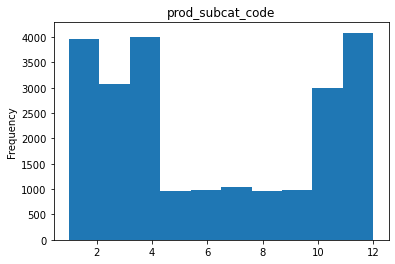

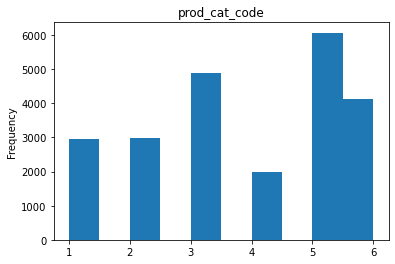

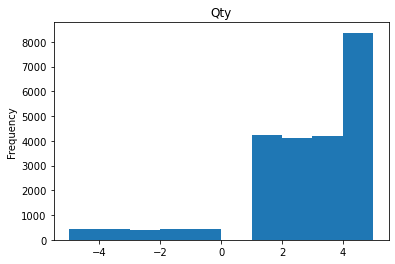

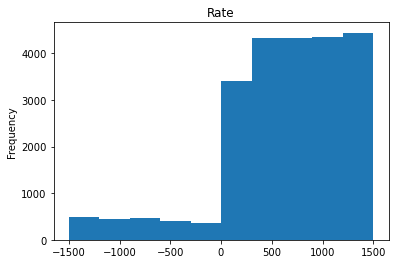

In [180]:
for var in conti_customer.columns:
    conti_customer[var].plot(kind='hist')
    plt.title(var)
    plt.show()

In [181]:
# categorical variables

cust_catg = customer_final.loc[:,customer_final.dtypes=='object']

In [182]:
cust_catg

tran_date Store_type          prod_cat prod_subcat         DOB Gender
0      28-02-2014     e-Shop          Clothing       Women  26-09-1981      M
1      27-02-2014     e-Shop       Electronics   Computers  11-05-1973      F
2      24-02-2014   TeleShop             Books         DIY  27-07-1992      M
3      24-02-2014     e-Shop  Home and kitchen        Bath  08-06-1981      M
4      23-02-2014   TeleShop             Books         DIY  27-07-1992      M
...           ...        ...               ...         ...         ...    ...
23048  25-01-2011     e-Shop             Books    Academic  21-02-1972      M
23049  25-01-2011     e-Shop          Clothing        Mens  27-04-1984      M
23050  25-01-2011        MBR  Home and kitchen  Furnishing  20-06-1976      M
23051  25-01-2011   TeleShop             Books    Children  22-05-1970      M
23052  25-01-2011   TeleShop             Books    Children  15-01-1982      M

[23040 rows x 6 columns]

In [183]:
cust_catg.columns

Index(['tran_date', 'Store_type', 'prod_cat', 'prod_subcat', 'DOB', 'Gender'], dtype='object')

In [184]:
cust_catg.head()

tran_date Store_type          prod_cat prod_subcat         DOB Gender
0  28-02-2014     e-Shop          Clothing       Women  26-09-1981      M
1  27-02-2014     e-Shop       Electronics   Computers  11-05-1973      F
2  24-02-2014   TeleShop             Books         DIY  27-07-1992      M
3  24-02-2014     e-Shop  Home and kitchen        Bath  08-06-1981      M
4  23-02-2014   TeleShop             Books         DIY  27-07-1992      M

In [185]:
plt.figure(figsize=(6,8))
sns.countplot(cust_catg['Gender'])
plt.show()

C:\Users\avita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


C:\Users\avita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


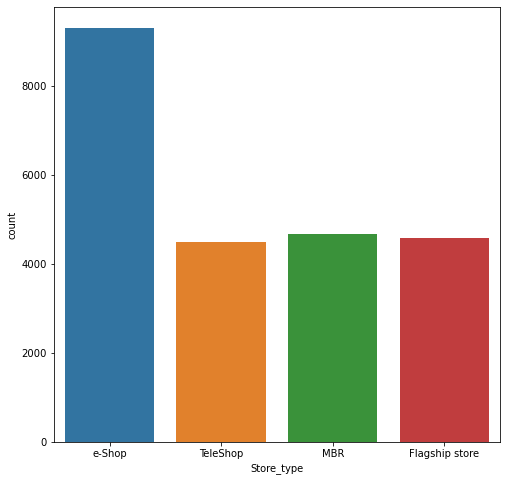

In [186]:
plt.figure(figsize=(8,8))
sns.countplot(cust_catg['Store_type'])
plt.show()

C:\Users\avita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


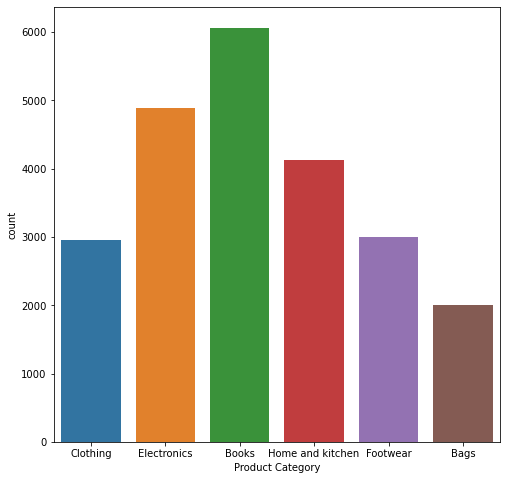

In [187]:
plt.figure(figsize=(8,8))
sns.countplot(cust_catg['prod_cat'])
plt.xlabel('Product Category')
plt.show()

In [188]:
plt.figure(figsize=(8,8))
cust_catg.groupby('prod_subcat')['prod_subcat'].count().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Product Subcategory')
plt.show()

In [189]:
# 4 a. Time period of the available transaction data

In [190]:
customer_final.sort_values(by="tran_date")

transaction_id  cust_id tran_date  prod_subcat_code  prod_cat_code  \
16050     47933752822   270192  1/1/2012                 3              1   
16052     35798683065   271913  1/1/2012                 1              1   
16053     30078154552   269151  1/1/2012                 3              2   
16054     57039573748   268282  1/1/2012                 4              1   
16055     41901986246   269269  1/1/2012                 7              5   
...               ...      ...       ...               ...            ...   
3418       7142765743   270331  9/9/2013                 1              4   
3417      56887661045   271112  9/9/2013                 2              6   
3416        930973786   267264  9/9/2013                 2              6   
3426      62656748444   274079  9/9/2013                 4              3   
3431      74210075173   273342  9/9/2013                 4              1   

       Qty  Rate      Tax  total_amt Store_type          prod_cat prod_subcat  \
16050    4   215   90.300    950.300     e-Shop          Clothing        Kids   
16052    1   229   24.045    253.045        MBR          Clothing       Women   
16053    1   456   47.880    503.880     e-Shop          Footwear       Women   
16054    1  1024  107.520   1131.520        MBR          Clothing        Mens   
16055    2  1122  235.620   2479.620        MBR             Books     Fiction   
...    ...   ...      ...        ...        ...               ...         ...   
3418     1  1126  118.230   1244.230     e-Shop              Bags        Mens   
3417     3   740  233.100   2453.100   TeleShop  Home and kitchen  Furnishing   
3416     3  1245  392.175   4127.175   TeleShop  Home and kitchen  Furnishing   
3426     5  1195  627.375   6602.375     e-Shop       Electronics     Mobiles   
3431     3   117   36.855    387.855   TeleShop          Clothing        Mens   

       customer_Id         DOB Gender  city_code  
16050       270192  01-06-1987      F        4.0  
16052       271913  15-10-1985      F        2.0  
16053       269151  29-04-1981      F        2.0  
16054       268282  22-12-1970      F        1.0  
16055       269269  04-02-1981      M        1.0  
...            ...         ...    ...        ...  
3418        270331  08-10-1970      F       10.0  
3417        271112  26-05-1979      M        7.0  
3416        267264  25-04-1989      F        6.0  
3426        274079  05-02-1983      F        7.0  
3431        273342  25-10-1985      F        9.0  

[23040 rows x 16 columns]

In [191]:
customer_final["tran_date"]=pd.to_datetime(customer_final["tran_date"])
min_date = customer_final["tran_date"].min()
max_date = customer_final["tran_date"].max()


In [256]:
min_date

Timestamp('2011-01-02 00:00:00')

In [257]:
max_date

Timestamp('2014-12-02 00:00:00')

In [192]:
print("Time period of the available transaction data is from"
+ pd.Timestamp.strftime(min_date,format="%d-%m-%Y") + " to " 
+ pd.Timestamp.strftime(max_date,format="%d-%m-%Y"))

Time period of the available transaction data is from02-01-2011 to 02-12-2014


In [193]:
# b ount of transactions where the total amount of transaction was negative

In [194]:
customer_final.head()

transaction_id  cust_id  tran_date  prod_subcat_code  prod_cat_code  Qty  \
0     80712190438   270351 2014-02-28                 1              1   -5   
1     29258453508   270384 2014-02-27                 5              3   -5   
2     51750724947   273420 2014-02-24                 6              5   -2   
3     93274880719   271509 2014-02-24                11              6   -3   
4     51750724947   273420 2014-02-23                 6              5   -2   

   Rate      Tax  total_amt Store_type          prod_cat prod_subcat  \
0  -772  405.300  -4265.300     e-Shop          Clothing       Women   
1 -1497  785.925  -8270.925     e-Shop       Electronics   Computers   
2  -791  166.110  -1748.110   TeleShop             Books         DIY   
3 -1363  429.345  -4518.345     e-Shop  Home and kitchen        Bath   
4  -791  166.110  -1748.110   TeleShop             Books         DIY   

   customer_Id         DOB Gender  city_code  
0       270351  26-09-1981      M        5.0  
1       270384  11-05-1973      F        8.0  
2       273420  27-07-1992      M        8.0  
3       271509  08-06-1981      M        3.0  
4       273420  27-07-1992      M        8.0

In [195]:
negative_transaction = customer_final.loc[customer_final["total_amt"] < 0,"transaction_id"].count()

In [196]:
print("Count of transactions where the total amount of transaction was negative is",negative_transaction)

Count of transactions where the total amount of transaction was negative is 2164


In [197]:
# 5. Analyze which product categories are more popular among females vs male customers

In [198]:
product_gender = customer_final.groupby(["Gender","prod_cat"])[["Qty"]].sum().reset_index()

In [199]:
product_gender

Gender          prod_cat   Qty
0       F              Bags  2364
1       F             Books  7080
2       F          Clothing  3425
3       F       Electronics  5832
4       F          Footwear  3721
5       F  Home and kitchen  4898
6       M              Bags  2346
7       M             Books  7587
8       M          Clothing  3748
9       M       Electronics  6486
10      M          Footwear  3561
11      M  Home and kitchen  5051

In [200]:
# 6. Which City code has the maximum customers and what was the percentage of customers from 
that city?

Object `city` not found.


In [258]:
customer_final.head()

transaction_id  cust_id  tran_date  prod_subcat_code  prod_cat_code  Qty  \
0     80712190438   270351 2014-02-28                 1              1   -5   
1     29258453508   270384 2014-02-27                 5              3   -5   
2     51750724947   273420 2014-02-24                 6              5   -2   
3     93274880719   271509 2014-02-24                11              6   -3   
4     51750724947   273420 2014-02-23                 6              5   -2   

   Rate      Tax  total_amt Store_type          prod_cat prod_subcat  \
0  -772  405.300  -4265.300     e-Shop          Clothing       Women   
1 -1497  785.925  -8270.925     e-Shop       Electronics   Computers   
2  -791  166.110  -1748.110   TeleShop             Books         DIY   
3 -1363  429.345  -4518.345     e-Shop  Home and kitchen        Bath   
4  -791  166.110  -1748.110   TeleShop             Books         DIY   

   customer_Id        DOB Gender  city_code   AGE Age_catg Age_cat  
0       270351 1981-09-26      M        5.0  40.0    36-46   36-46  
1       270384 1973-11-05      F        8.0  48.0    47-57   47-57  
2       273420 1992-07-27      M        8.0  29.0    25-35   25-35  
3       271509 1981-08-06      M        3.0  40.0    36-46   36-46  
4       273420 1992-07-27      M        8.0  29.0    25-35   25-35

In [259]:
customer_group = customer_final.groupby('city_code')['customer_Id'].count().sort_values(ascending =False)

In [260]:
customer_group

city_code
4.0     2422
3.0     2410
5.0     2357
7.0     2356
10.0    2333
8.0     2328
2.0     2268
1.0     2255
9.0     2176
6.0     2127
Name: customer_Id, dtype: int64

In [204]:
percentage = round((customer_group[4.0] / customer_group.sum()) * 100,2)

In [205]:
percentage

10.52

In [206]:
print("City code 4.0 has the maximum customers and the percentage of customers from that city is ",percentage)

City code 4.0 has the maximum customers and the percentage of customers from that city is  10.52


In [207]:
# 7. Which store type sells the maximum products by value and by quantity?

In [208]:
customer_final.groupby("Store_type")["Qty","Rate"].sum().sort_values(by="Qty",ascending=False)

C:\Users\avita\AppData\Local\Temp/ipykernel_4240/2464577125.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  customer_final.groupby("Store_type")["Qty","Rate"].sum().sort_values(by="Qty",ascending=False)


Qty     Rate
Store_type                    
e-Shop          22790  5945770
MBR             11195  2953665
Flagship store  11142  2942874
TeleShop        10993  2836359

In [209]:
# 8 What was the total amount earned from the "Electronics" and "Clothing" categories from 
Flagship Stores?

Object `Stores` not found.


In [210]:
store_group = round(customer_final.pivot_table(index = "prod_cat",columns="Store_type", values="total_amt", aggfunc='sum'),2)

In [211]:
store_group

Store_type        Flagship store         MBR    TeleShop      e-Shop
prod_cat                                                            
Bags                   870548.84   848678.68   789181.06  1617933.26
Books                 2493677.81  2496039.19  2545714.47  5297161.16
Clothing              1194423.23  1287686.34  1241834.36  2527193.56
Electronics           2215136.04  2107969.83  1978457.20  4429142.77
Footwear              1234806.56  1112163.72  1235719.29  2643215.25
Home and kitchen      1713004.15  1822403.57  1581227.38  3327977.12

In [212]:
store_group.loc[["Clothing","Electronics"],"Flagship store"]

prod_cat
Clothing       1194423.23
Electronics    2215136.04
Name: Flagship store, dtype: float64

In [261]:
store_group.loc[["Clothing","Electronics"],"Flagship store"].sum()

3409559.27

In [213]:
# 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [214]:
gender_group = round(customer_final.pivot_table(index = "prod_cat",columns="Gender", values="total_amt", aggfunc='sum'),2)

In [215]:
gender_group

Gender                     F           M
prod_cat                                
Bags              2079618.84  2046722.99
Books             6174590.82  6645972.78
Clothing          3026750.80  3224079.50
Electronics       5019354.21  5711351.62
Footwear          3203155.22  3020200.36
Home and kitchen  4133702.24  4305169.50

In [216]:
male_earning = gender_group.loc["Electronics","M"]

In [217]:
male_earning

5711351.62

In [218]:
# 10. How many customers have more than 10 unique transactions, after removing all transactions 
which have any negative amounts?

Object `amounts` not found.


In [219]:
pos_trans = customer_final.loc[customer_final["total_amt"]>0,:]

In [220]:
pos_trans

transaction_id  cust_id  tran_date  prod_subcat_code  prod_cat_code  \
10        29258453508   270384 2014-02-20                 5              3   
11        25455265351   267750 2014-02-20                12              6   
12         1571002198   275023 2014-02-20                 6              5   
14        36554696014   269345 2014-02-20                 3              5   
15        56814940239   268799 2014-02-20                 7              5   
...               ...      ...        ...               ...            ...   
23048     94340757522   274550 2011-01-25                12              5   
23049     89780862956   270022 2011-01-25                 4              1   
23050     85115299378   271020 2011-01-25                 2              6   
23051     72870271171   270911 2011-01-25                11              5   
23052     77960931771   271961 2011-01-25                11              5   

       Qty  Rate      Tax  total_amt Store_type          prod_cat prod_subcat  \
10       5  1497  785.925   8270.925     e-Shop       Electronics   Computers   
11       3  1360  428.400   4508.400     e-Shop  Home and kitchen       Tools   
12       4   587  246.540   2594.540     e-Shop             Books         DIY   
14       3  1253  394.695   4153.695     e-Shop             Books      Comics   
15       5   368  193.200   2033.200     e-Shop             Books     Fiction   
...    ...   ...      ...        ...        ...               ...         ...   
23048    1  1264  132.720   1396.720     e-Shop             Books    Academic   
23049    1   677   71.085    748.085     e-Shop          Clothing        Mens   
23050    4  1052  441.840   4649.840        MBR  Home and kitchen  Furnishing   
23051    3  1142  359.730   3785.730   TeleShop             Books    Children   
23052    1   447   46.935    493.935   TeleShop             Books    Children   

       customer_Id         DOB Gender  city_code  
10          270384  11-05-1973      F        8.0  
11          267750  13-10-1986      M        1.0  
12          275023  09-03-1971      M        6.0  
14          269345  26-06-1970      F       10.0  
15          268799  27-06-1979      M        9.0  
...            ...         ...    ...        ...  
23048       274550  21-02-1972      M        7.0  
23049       270022  27-04-1984      M        9.0  
23050       271020  20-06-1976      M        8.0  
23051       270911  22-05-1970      M        2.0  
23052       271961  15-01-1982      M        1.0  

[20876 rows x 16 columns]

In [221]:
unique_trans = pos_trans.groupby(['customer_Id','prod_cat','prod_subcat'])['transaction_id'].count().reset_index()

In [222]:
unique_trans

customer_Id          prod_cat  prod_subcat  transaction_id
0           266783             Books  Non-Fiction               1
1           266783          Clothing         Mens               2
2           266783          Footwear         Mens               1
3           266784             Books      Fiction               1
4           266784             Books  Non-Fiction               1
...            ...               ...          ...             ...
19273       275264             Books  Non-Fiction               1
19274       275264  Home and kitchen        Tools               1
19275       275265              Bags         Mens               1
19276       275265             Books     Academic               1
19277       275265  Home and kitchen   Furnishing               1

[19278 rows x 4 columns]

In [223]:
unique_trans_count = unique_trans.groupby('customer_Id')['transaction_id'].count().reset_index()

In [224]:
unique_trans_count

customer_Id  transaction_id
0          266783               3
1          266784               3
2          266785               5
3          266788               4
4          266794               8
...           ...             ...
5501       275257               4
5502       275261               3
5503       275262               2
5504       275264               2
5505       275265               3

[5506 rows x 2 columns]

In [262]:
unique_num=unique_trans.groupby('customer_Id')['transaction_id'].count().reset_index()

In [263]:
unique_num

customer_Id  transaction_id
0          266783               3
1          266784               3
2          266785               5
3          266788               4
4          266794               8
...           ...             ...
5501       275257               4
5502       275261               3
5503       275262               2
5504       275264               2
5505       275265               3

[5506 rows x 2 columns]

In [265]:
unique_num[unique_num['transaction_id'] > 10].count()

customer_Id       0
transaction_id    0
dtype: int64

In [266]:
print('There are no unique transactions greater than 10')

There are no unique transactions greater than 10


In [227]:
# 11 a. What was the total amount spent for “Electronics” and “Books” product categories?

In [267]:
customer_final


transaction_id  cust_id  tran_date  prod_subcat_code  prod_cat_code  \
0         80712190438   270351 2014-02-28                 1              1   
1         29258453508   270384 2014-02-27                 5              3   
2         51750724947   273420 2014-02-24                 6              5   
3         93274880719   271509 2014-02-24                11              6   
4         51750724947   273420 2014-02-23                 6              5   
...               ...      ...        ...               ...            ...   
23048     94340757522   274550 2011-01-25                12              5   
23049     89780862956   270022 2011-01-25                 4              1   
23050     85115299378   271020 2011-01-25                 2              6   
23051     72870271171   270911 2011-01-25                11              5   
23052     77960931771   271961 2011-01-25                11              5   

       Qty  Rate      Tax  total_amt Store_type          prod_cat prod_subcat  \
0       -5  -772  405.300  -4265.300     e-Shop          Clothing       Women   
1       -5 -1497  785.925  -8270.925     e-Shop       Electronics   Computers   
2       -2  -791  166.110  -1748.110   TeleShop             Books         DIY   
3       -3 -1363  429.345  -4518.345     e-Shop  Home and kitchen        Bath   
4       -2  -791  166.110  -1748.110   TeleShop             Books         DIY   
...    ...   ...      ...        ...        ...               ...         ...   
23048    1  1264  132.720   1396.720     e-Shop             Books    Academic   
23049    1   677   71.085    748.085     e-Shop          Clothing        Mens   
23050    4  1052  441.840   4649.840        MBR  Home and kitchen  Furnishing   
23051    3  1142  359.730   3785.730   TeleShop             Books    Children   
23052    1   447   46.935    493.935   TeleShop             Books    Children   

       customer_Id        DOB Gender  city_code   AGE Age_catg Age_cat  
0           270351 1981-09-26      M        5.0  40.0    36-46   36-46  
1           270384 1973-11-05      F        8.0  48.0    47-57   47-57  
2           273420 1992-07-27      M        8.0  29.0    25-35   25-35  
3           271509 1981-08-06      M        3.0  40.0    36-46   36-46  
4           273420 1992-07-27      M        8.0  29.0    25-35   25-35  
...            ...        ...    ...        ...   ...      ...     ...  
23048       274550 1972-02-21      M        7.0  50.0    47-57   47-57  
23049       270022 1984-04-27      M        9.0  37.0    36-46   36-46  
23050       271020 1976-06-20      M        8.0  45.0    36-46   36-46  
23051       270911 1970-05-22      M        2.0  51.0    47-57   47-57  
23052       271961 1982-01-15      M        1.0  40.0    36-46   36-46  

[23040 rows x 19 columns]

In [268]:
customer_final['DOB'] = pd.to_datetime(customer_final['DOB'])
customer_final['DOB']

0       1981-09-26
1       1973-11-05
2       1992-07-27
3       1981-08-06
4       1992-07-27
           ...    
23048   1972-02-21
23049   1984-04-27
23050   1976-06-20
23051   1970-05-22
23052   1982-01-15
Name: DOB, Length: 23040, dtype: datetime64[ns]

In [288]:
customer_final['DOB'].dtype

dtype('<M8[ns]')

In [289]:
now = pd.Timestamp('now')

In [290]:
now

Timestamp('2022-03-04 02:16:36.148958')

In [293]:

customer_final['DOB'] = customer_final['DOB'].where(customer_final['DOB'] < now, customer_final['DOB'] -  np.timedelta64(100, 'Y'))   # 2
customer_final['AGE'] = (now - customer_final['DOB']).astype('<m8[Y]')

In [294]:
customer_final

transaction_id  cust_id  tran_date  prod_subcat_code  prod_cat_code  \
0         80712190438   270351 2014-02-28                 1              1   
1         29258453508   270384 2014-02-27                 5              3   
2         51750724947   273420 2014-02-24                 6              5   
3         93274880719   271509 2014-02-24                11              6   
4         51750724947   273420 2014-02-23                 6              5   
...               ...      ...        ...               ...            ...   
23048     94340757522   274550 2011-01-25                12              5   
23049     89780862956   270022 2011-01-25                 4              1   
23050     85115299378   271020 2011-01-25                 2              6   
23051     72870271171   270911 2011-01-25                11              5   
23052     77960931771   271961 2011-01-25                11              5   

       Qty  Rate      Tax  total_amt Store_type          prod_cat prod_subcat  \
0       -5  -772  405.300  -4265.300     e-Shop          Clothing       Women   
1       -5 -1497  785.925  -8270.925     e-Shop       Electronics   Computers   
2       -2  -791  166.110  -1748.110   TeleShop             Books         DIY   
3       -3 -1363  429.345  -4518.345     e-Shop  Home and kitchen        Bath   
4       -2  -791  166.110  -1748.110   TeleShop             Books         DIY   
...    ...   ...      ...        ...        ...               ...         ...   
23048    1  1264  132.720   1396.720     e-Shop             Books    Academic   
23049    1   677   71.085    748.085     e-Shop          Clothing        Mens   
23050    4  1052  441.840   4649.840        MBR  Home and kitchen  Furnishing   
23051    3  1142  359.730   3785.730   TeleShop             Books    Children   
23052    1   447   46.935    493.935   TeleShop             Books    Children   

       customer_Id        DOB Gender  city_code   AGE Age_catg Age_cat  
0           270351 1981-09-26      M        5.0  40.0    36-46   36-46  
1           270384 1973-11-05      F        8.0  48.0    47-57   47-57  
2           273420 1992-07-27      M        8.0  29.0    25-35   25-35  
3           271509 1981-08-06      M        3.0  40.0    36-46   36-46  
4           273420 1992-07-27      M        8.0  29.0    25-35   25-35  
...            ...        ...    ...        ...   ...      ...     ...  
23048       274550 1972-02-21      M        7.0  50.0    47-57   47-57  
23049       270022 1984-04-27      M        9.0  37.0    36-46   36-46  
23050       271020 1976-06-20      M        8.0  45.0    36-46   36-46  
23051       270911 1970-05-22      M        2.0  51.0    47-57   47-57  
23052       271961 1982-01-15      M        1.0  40.0    36-46   36-46  

[23040 rows x 19 columns]

In [295]:
customer_final['Age_catg'] = pd.cut(customer_final['AGE'],bins=[24,35,46,57],labels=['25-35','36-46','47-57'],include_lowest=True)

In [296]:
customer_final['Age_catg']

0        36-46
1        47-57
2        25-35
3        36-46
4        25-35
         ...  
23048    47-57
23049    36-46
23050    36-46
23051    47-57
23052    36-46
Name: Age_catg, Length: 23040, dtype: category
Categories (3, object): ['25-35' < '36-46' < '47-57']

In [297]:
customer_final

transaction_id  cust_id  tran_date  prod_subcat_code  prod_cat_code  \
0         80712190438   270351 2014-02-28                 1              1   
1         29258453508   270384 2014-02-27                 5              3   
2         51750724947   273420 2014-02-24                 6              5   
3         93274880719   271509 2014-02-24                11              6   
4         51750724947   273420 2014-02-23                 6              5   
...               ...      ...        ...               ...            ...   
23048     94340757522   274550 2011-01-25                12              5   
23049     89780862956   270022 2011-01-25                 4              1   
23050     85115299378   271020 2011-01-25                 2              6   
23051     72870271171   270911 2011-01-25                11              5   
23052     77960931771   271961 2011-01-25                11              5   

       Qty  Rate      Tax  total_amt Store_type          prod_cat prod_subcat  \
0       -5  -772  405.300  -4265.300     e-Shop          Clothing       Women   
1       -5 -1497  785.925  -8270.925     e-Shop       Electronics   Computers   
2       -2  -791  166.110  -1748.110   TeleShop             Books         DIY   
3       -3 -1363  429.345  -4518.345     e-Shop  Home and kitchen        Bath   
4       -2  -791  166.110  -1748.110   TeleShop             Books         DIY   
...    ...   ...      ...        ...        ...               ...         ...   
23048    1  1264  132.720   1396.720     e-Shop             Books    Academic   
23049    1   677   71.085    748.085     e-Shop          Clothing        Mens   
23050    4  1052  441.840   4649.840        MBR  Home and kitchen  Furnishing   
23051    3  1142  359.730   3785.730   TeleShop             Books    Children   
23052    1   447   46.935    493.935   TeleShop             Books    Children   

       customer_Id        DOB Gender  city_code   AGE Age_catg Age_cat  
0           270351 1981-09-26      M        5.0  40.0    36-46   36-46  
1           270384 1973-11-05      F        8.0  48.0    47-57   47-57  
2           273420 1992-07-27      M        8.0  29.0    25-35   25-35  
3           271509 1981-08-06      M        3.0  40.0    36-46   36-46  
4           273420 1992-07-27      M        8.0  29.0    25-35   25-35  
...            ...        ...    ...        ...   ...      ...     ...  
23048       274550 1972-02-21      M        7.0  50.0    47-57   47-57  
23049       270022 1984-04-27      M        9.0  37.0    36-46   36-46  
23050       271020 1976-06-20      M        8.0  45.0    36-46   36-46  
23051       270911 1970-05-22      M        2.0  51.0    47-57   47-57  
23052       271961 1982-01-15      M        1.0  40.0    36-46   36-46  

[23040 rows x 19 columns]

In [298]:
cust_by_age = customer_final.groupby(['Age_catg','prod_cat'])['total_amt'].sum()

In [299]:
cust_by_age

Age_catg  prod_cat        
25-35     Bags                1175554.250
          Books               3583515.000
          Clothing            2034812.195
          Electronics         3276512.850
          Footwear            1938749.020
          Home and kitchen    2563251.925
36-46     Bags                1945324.875
          Books               6389905.600
          Clothing            2965569.165
          Electronics         4996838.730
          Footwear            2901450.435
          Home and kitchen    4110501.655
47-57     Bags                1005462.705
          Books               2859172.030
          Clothing            1250756.130
          Electronics         2457354.250
          Footwear            1385705.360
          Home and kitchen    1770858.635
Name: total_amt, dtype: float64

In [300]:
cust_by_age['25-35']

prod_cat
Bags                1175554.250
Books               3583515.000
Clothing            2034812.195
Electronics         3276512.850
Footwear            1938749.020
Home and kitchen    2563251.925
Name: total_amt, dtype: float64

In [301]:
cust_by_age.loc['25-35',['Electronics','Books']]

Age_catg  prod_cat   
25-35     Electronics    3276512.85
          Books          3583515.00
Name: total_amt, dtype: float64

In [302]:
cust_by_age.loc['25-35',['Electronics','Books']].sum().round(3)

6860027.85

In [ ]:
# 11 b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [315]:
total_amount = customer_final[customer_final['Age_catg']=='25-35']

In [316]:
total_amount

transaction_id  cust_id  tran_date  prod_subcat_code  prod_cat_code  \
2         51750724947   273420 2014-02-24                 6              5   
4         51750724947   273420 2014-02-23                 6              5   
11        25455265351   267750 2014-02-20                12              6   
23        91116291703   268509 2014-02-20                 1              2   
28        88853694830   268444 2014-02-20                 4              4   
...               ...      ...        ...               ...            ...   
23033     32887353269   268885 2011-01-25                 3              1   
23034     28972634039   275227 2011-01-25                 9              3   
23035     42161597232   267094 2011-01-25                 3              1   
23038     61812307223   274306 2011-01-25                 4              4   
23044     14787475597   273982 2011-01-25                 4              3   

       Qty  Rate      Tax  total_amt      Store_type          prod_cat  \
2       -2  -791  166.110  -1748.110        TeleShop             Books   
4       -2  -791  166.110  -1748.110        TeleShop             Books   
11       3  1360  428.400   4508.400          e-Shop  Home and kitchen   
23       4  1243  522.060   5494.060             MBR          Footwear   
28      -3   -80   25.200   -265.200             MBR              Bags   
...    ...   ...      ...        ...             ...               ...   
23033    1   276   28.980    304.980  Flagship store          Clothing   
23034    1   334   35.070    369.070             MBR       Electronics   
23035    3   147   46.305    487.305             MBR          Clothing   
23038    4  1447  607.740   6395.740          e-Shop              Bags   
23044    5   969  508.725   5353.725          e-Shop       Electronics   

      prod_subcat  customer_Id        DOB Gender  city_code   AGE Age_catg  \
2             DIY       273420 1992-07-27      M        8.0  29.0    25-35   
4             DIY       273420 1992-07-27      M        8.0  29.0    25-35   
11          Tools       267750 1986-10-13      M        1.0  35.0    25-35   
23           Mens       268509 1989-08-17      M       10.0  32.0    25-35   
28          Women       268444 1992-02-01      F        6.0  30.0    25-35   
...           ...          ...        ...    ...        ...   ...      ...   
23033        Kids       268885 1989-04-14      F        6.0  32.0    25-35   
23034     Cameras       275227 1989-09-23      M        4.0  32.0    25-35   
23035        Kids       267094 1992-11-24      M        9.0  29.0    25-35   
23038       Women       274306 1989-12-01      M        2.0  32.0    25-35   
23044     Mobiles       273982 1991-12-10      M        4.0  30.0    25-35   

      Age_cat  
2       25-35  
4       25-35  
11      25-35  
23      25-35  
28      25-35  
...       ...  
23033   25-35  
23034   25-35  
23035   25-35  
23038   25-35  
23044   25-35  

[6966 rows x 19 columns]

In [317]:
total_amount['tran_date']=pd.to_datetime(total_amount['tran_date'])

C:\Users\avita\AppData\Local\Temp/ipykernel_4240/1662905074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_amount['tran_date']=pd.to_datetime(total_amount['tran_date'])


In [318]:
total_amount['tran_date'].dtype

dtype('<M8[ns]')

In [319]:
period_total = total_amount[(total_amount['tran_date'] >='2014-01-01') & (total_amount['tran_date'] <='2014-03-01')]

In [320]:
period_total

transaction_id  cust_id  tran_date  prod_subcat_code  prod_cat_code  \
2        51750724947   273420 2014-02-24                 6              5   
4        51750724947   273420 2014-02-23                 6              5   
11       25455265351   267750 2014-02-20                12              6   
23       91116291703   268509 2014-02-20                 1              2   
28       88853694830   268444 2014-02-20                 4              4   
...              ...      ...        ...               ...            ...   
1048     14460826915   269348 2014-01-01                11              6   
1051     32889219128   269536 2014-01-01                10              5   
1054     42711619809   271701 2014-01-01                 1              2   
1059     67088172893   271877 2014-01-01                 1              1   
1061     63635040022   268886 2014-01-01                 3              2   

      Qty  Rate      Tax  total_amt Store_type          prod_cat  prod_subcat  \
2      -2  -791  166.110  -1748.110   TeleShop             Books          DIY   
4      -2  -791  166.110  -1748.110   TeleShop             Books          DIY   
11      3  1360  428.400   4508.400     e-Shop  Home and kitchen        Tools   
23      4  1243  522.060   5494.060        MBR          Footwear         Mens   
28     -3   -80   25.200   -265.200        MBR              Bags        Women   
...   ...   ...      ...        ...        ...               ...          ...   
1048    3    84   26.460    278.460        MBR  Home and kitchen         Bath   
1051    5  1423  747.075   7862.075     e-Shop             Books  Non-Fiction   
1054    5   336  176.400   1856.400        MBR          Footwear         Mens   
1059    1   902   94.710    996.710     e-Shop          Clothing        Women   
1061    5   652  342.300   3602.300     e-Shop          Footwear        Women   

      customer_Id        DOB Gender  city_code   AGE Age_catg Age_cat  
2          273420 1992-07-27      M        8.0  29.0    25-35   25-35  
4          273420 1992-07-27      M        8.0  29.0    25-35   25-35  
11         267750 1986-10-13      M        1.0  35.0    25-35   25-35  
23         268509 1989-08-17      M       10.0  32.0    25-35   25-35  
28         268444 1992-02-01      F        6.0  30.0    25-35   25-35  
...           ...        ...    ...        ...   ...      ...     ...  
1048       269348 1989-10-02      M        9.0  32.0    25-35   25-35  
1051       269536 1990-03-21      M        5.0  31.0    25-35   25-35  
1054       271701 1991-11-07      M        7.0  30.0    25-35   25-35  
1059       271877 1992-03-28      F        6.0  29.0    25-35   25-35  
1061       268886 1992-03-08      M        1.0  29.0    25-35   25-35  

[213 rows x 19 columns]

In [321]:
period_total['total_amt'].sum().round(2)

481508.17